# kmeans

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [2]:
df  = pd.read_csv('df_tratado55.csv')
df= df.drop('Unnamed: 0', axis= 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,subscription,season
0,30,1,1,2,0,1,0,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,0,1
1,39,7,2,3,0,0,0,1,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,0,1
2,25,7,1,3,0,1,0,1,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,0,2
3,47,0,1,6,0,1,0,0,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,0,0
4,32,7,2,6,0,0,0,0,2,128,3,999,2,0,-1.1,94.199,-37.5,0.884,0,0


In [3]:
df['default'].value_counts()

0    3089
1       1
Name: default, dtype: int64

In [4]:
X = df.values
X

array([[30.   ,  1.   ,  1.   , ...,  1.313,  0.   ,  1.   ],
       [39.   ,  7.   ,  2.   , ...,  4.855,  0.   ,  1.   ],
       [25.   ,  7.   ,  1.   , ...,  4.962,  0.   ,  2.   ],
       ...,
       [27.   ,  8.   ,  2.   , ...,  1.354,  0.   ,  1.   ],
       [58.   ,  0.   ,  1.   , ...,  4.966,  0.   ,  2.   ],
       [34.   ,  4.   ,  2.   , ...,  4.12 ,  0.   ,  0.   ]])

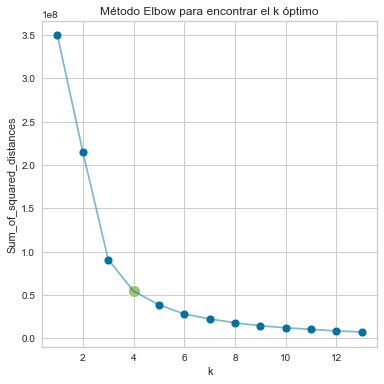

In [14]:
Sum_of_squared_distances = []

k_candidates = range(1, 14)
for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(X)
    Sum_of_squared_distances.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=k_candidates, y = Sum_of_squared_distances, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[3]], y = [Sum_of_squared_distances[3]],  s=150, ax=ax)
sns.lineplot(x=k_candidates, y = Sum_of_squared_distances, alpha=0.5, ax=ax)
ax.set(title='Método Elbow para encontrar el k óptimo', ylabel='Sum_of_squared_distances', xlabel='k');

In [7]:
# Ejecutar el algoritmo de k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

clusters = []
for i in range(4):
    cluster_i = np.where(labels == i)[0]
    clusters.append(cluster_i)

In [8]:
for i, cluster in enumerate(clusters):
    num_observations = len(cluster)
    print(f"El cluster {i+1} tiene {num_observations} observaciones.")

El cluster 1 tiene 2270 observaciones.
El cluster 2 tiene 90 observaciones.
El cluster 3 tiene 140 observaciones.
El cluster 4 tiene 590 observaciones.


In [9]:
silhouette_score = metrics.silhouette_score(df, labels)
calinski_score = metrics.calinski_harabasz_score(df, labels)
davies_bouldin_score = metrics.davies_bouldin_score(df, labels)
silhouette_score
calinski_score
davies_bouldin_score

0.48765196681792866

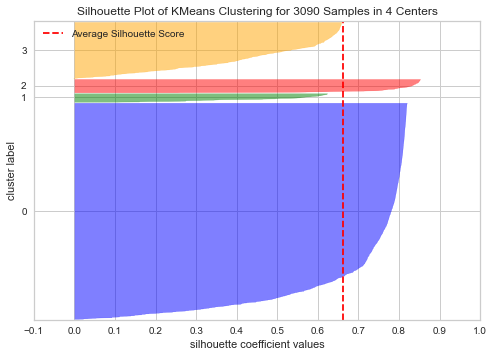

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3090 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
# Crear el visualizador de coeficientes de silueta
visualizer = SilhouetteVisualizer(kmeans, colors = ["blue", "green", "red",'orange'])
visualizer.fit(X)
visualizer.poof()